# Module 1

* [Intro](#Introduction)
* [Make your first plots](#Make-your-first-plots)
* [Setting asthetics](#Setting-asthetetics,-context,-theme)
* [Add pvalues](#Add-pvalues)
* [Organize plots in figure](#Organize-plots-in-figure)
* [Split plots per category values](#Split-plots-per-category-values)

___


## Introduction

We will work with [seaborn](https://seaborn.pydata.org/index.html) build on top of Matplolib.

There is many plots we can do as describe [here](https://seaborn.pydata.org/examples/index.html)

We will not cover all of them.

| Function  | Description |
| ------------- | ------------- |
| boxplot | Draw a box plot to show distributions with respect to categories |
| kdeplot | Plot univariate or bivariate distributions using kernel density estimation. |
| stripplot | Draw a scatterplot where one variable is categorical. |
| histplot | Plot univariate or bivariate histograms to show distributions of datasets. |
|  |  |
| displot | Figure-level interface for drawing distribution plots onto a FacetGrid. |
| relplot | Figure-level interface for drawing relational plots onto a FacetGrid.  |


Import the libraries.  
Load the dataset.
___


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

#print(sns.get_dataset_names())

sns.set_theme(style="whitegrid")

# Load the dataset
dataframe = sns.load_dataset("iris")

print(dataframe.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


___
### Make your first plots

Try to plot 3 different plots, anything you want.  
Take examples from the sneaborn library.  
Then we will try to customize them.  
____

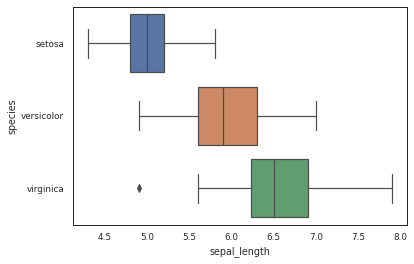

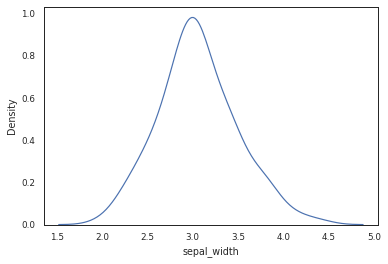

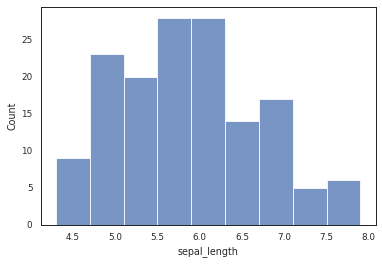

In [61]:
sns.boxplot(x='sepal_length',y='species',data=dataframe)
plt.show()
sns.kdeplot(x=dataframe['sepal_width'])
plt.show()
sns.histplot(x="sepal_length",data=dataframe)
plt.show()


___
## Setting asthetics, context, theme

1 - Set the parameters that control the scaling of plot elements.

This affects things like the size of the labels, lines, and other elements of the plot, but not the overall style.   
The base context is “notebook”, and the other contexts are “paper”, “talk”, and “poster”  

2 - Try to play around the figure aesthetics.It's another set function...
___



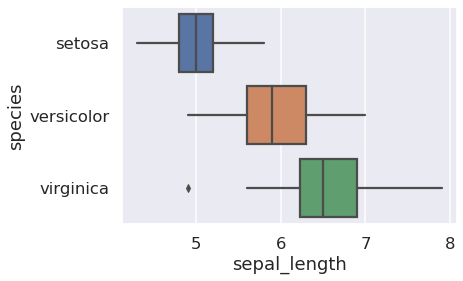

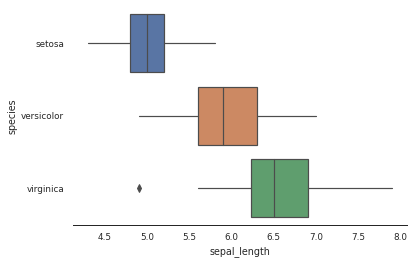

In [85]:
sns.set_theme(style="darkgrid") #whitegrid white
sns.set_context("talk") # 
sns.boxplot(x='sepal_length',y='species',data=dataframe,showcaps=False)
plt.savefig('./figure/notebook.png', dpi=300)
plt.show()

sns.set_theme(style="white")
sns.set_context("paper")  
sns.boxplot(x='sepal_length',y='species',data=dataframe,showcaps=False)
sns.despine(left=True,right=True)
plt.savefig('./figure/paper.png', dpi=300)
plt.show()


___
### Add pvalues

There is a package to add Pval that is good to know...
Find it, Try to add pvals to your figure.

T-test to compare normal two distributions.  
Wilcoxon-Mann-Withney to compare two distributions (the non parametric way).    
Kruskall-Wallis to compare more than 2 distributions.  
___

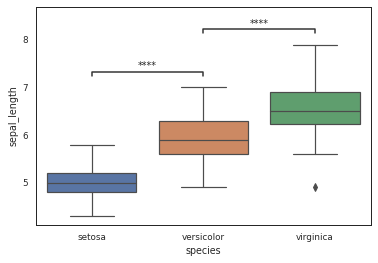

In [60]:
from statannot import add_stat_annotation


order = ['setosa', 'versicolor', 'virginica']
ax = sns.boxplot(x='species',y='sepal_length',order=order,data=dataframe)

test_results = add_stat_annotation(ax, data=dataframe, x='species', y='sepal_length', order=order,
                                   box_pairs=[("setosa", "versicolor"),("versicolor", "virginica")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='inside', verbose=0)

plt.show()

___

## Organize plots in figure

We create the figure with the subplots.  

Where axes is an array with each subplot.

We will see in Module 2 that we can do more complex combination of plots.
___


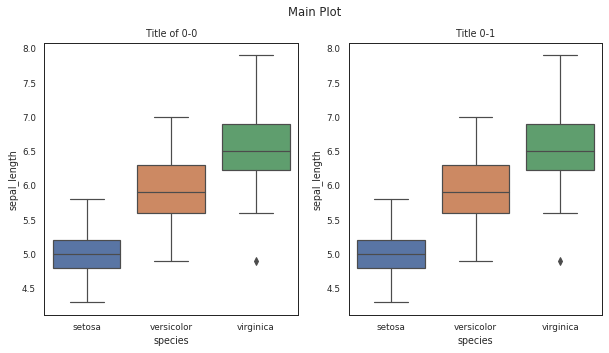

In [78]:
fig, axes = plt.subplots(1, 2,figsize=(10,5))

sns.boxplot(x='species',y='sepal_length',data=dataframe,ax=axes[0])
sns.boxplot(x='species',y='sepal_length',data=dataframe,ax=axes[1])
# You also can plot this in the flow without giving ax values.
axes[0].set_title('Title of 0-0')
axes[1].set_title('Title 0-1')

plt.suptitle("Main Plot")
plt.savefig('./figure/FusionPlots.png', dpi=300)

plt.show()

___

## Split-plots-per-category-values
___
